In [47]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)
plotsize=(16, 9)

In [66]:
data = pd.read_csv('datasets/forest_fire_dataset.csv')
print('Количество признаков:', len(data.columns))
print('Количество объектов:', len(data))

Количество признаков: 13
Количество объектов: 517


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [10]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
print(data)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [12]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [13]:
data['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [14]:
cleared_data = data[data['area'] > 0.0]
cleared_data.info()
print(cleared_data.sort_values('area'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 138 to 514
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       270 non-null    int64  
 1   Y       270 non-null    int64  
 2   month   270 non-null    object 
 3   day     270 non-null    object 
 4   FFMC    270 non-null    float64
 5   DMC     270 non-null    float64
 6   DC      270 non-null    float64
 7   ISI     270 non-null    float64
 8   temp    270 non-null    float64
 9   RH      270 non-null    int64  
 10  wind    270 non-null    float64
 11  rain    270 non-null    float64
 12  area    270 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 29.5+ KB
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
246  5  4   aug  sun  91.8  175.1  700.7  13.8  25.7  39   5.4   0.0     0.09
266  6  5   aug  tue  94.3  131.7  607.1  22.7  19.4  55   4.0   0.0     0.17
252  6  5   aug  wed  93.1  157.3  666.7 

In [15]:
cleared_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.807407,4.366667,91.034074,114.707778,570.867037,9.177037,19.311111,43.733333,4.112963,0.028889,24.600185
std,2.383326,1.170740,3.709020,61.786520,229.981242,4.147350,6.179444,15.080059,1.884573,0.398392,86.501635
min,1.000000,2.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000
25%,3.000000,4.000000,90.325000,82.900000,486.500000,6.800000,16.125000,33.000000,2.700000,0.000000,2.140000
50%,5.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.370000
75%,7.000000,5.000000,92.975000,141.300000,721.325000,11.375000,23.400000,53.000000,4.900000,0.000000,15.422500
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000


In [16]:
null_data = data[data['area'] == 0.0]
null_data.info()
print(null_data.sort_values('area'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       247 non-null    int64  
 1   Y       247 non-null    int64  
 2   month   247 non-null    object 
 3   day     247 non-null    object 
 4   FFMC    247 non-null    float64
 5   DMC     247 non-null    float64
 6   DC      247 non-null    float64
 7   ISI     247 non-null    float64
 8   temp    247 non-null    float64
 9   RH      247 non-null    int64  
 10  wind    247 non-null    float64
 11  rain    247 non-null    float64
 12  area    247 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 27.0+ KB
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
298  8  6   jun  wed  91.2  147.8  377.2  12.7  19.6  43   4.9   0.0   0.0
299  6  5   jun  sat  53.4   71.0  233.8   0.4  10.6

In [18]:
null_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0
mean,4.518219,4.226721,90.219028,106.679757,522.878138,8.851822,18.427935,44.894737,3.913360,0.013765,0.0
std,2.230305,1.289898,6.965969,66.300811,264.637833,4.974102,5.344018,17.581779,1.681857,0.100268,0.0
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,4.200000,15.000000,0.900000,0.000000,0.0
25%,3.000000,4.000000,90.200000,51.300000,360.100000,6.300000,15.200000,32.000000,2.700000,0.000000,0.0
50%,4.000000,4.000000,91.600000,103.200000,661.300000,8.400000,18.600000,42.000000,3.600000,0.000000,0.0
75%,6.000000,5.000000,92.600000,142.400000,706.500000,10.600000,21.600000,54.000000,5.150000,0.000000,0.0
max,9.000000,9.000000,96.200000,290.000000,855.300000,56.100000,32.400000,100.000000,8.500000,1.000000,0.0


/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


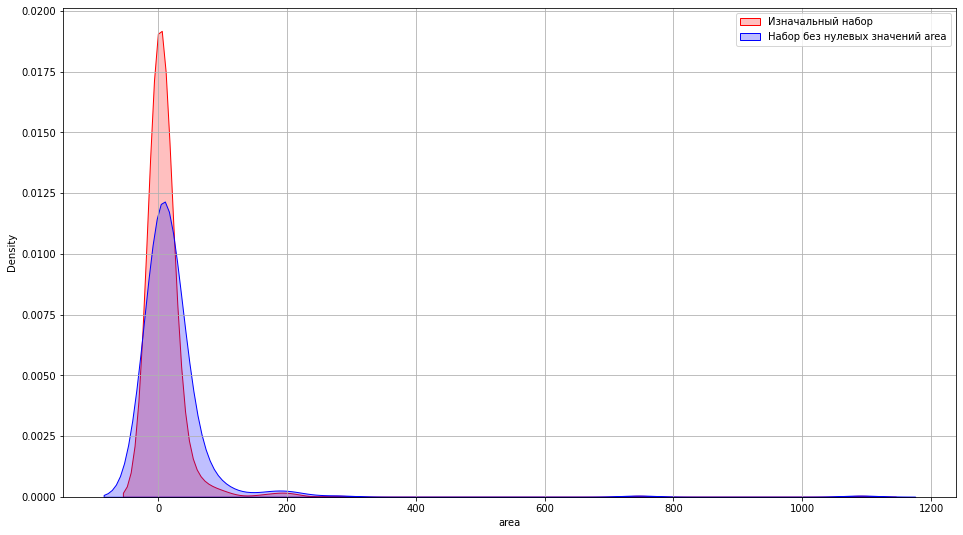

In [19]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.kdeplot(data['area'], shade=True, color='r', label="Изначальный набор")
sns.kdeplot(cleared_data['area'], shade=True, color='b', label="Набор без нулевых значений area")
sns.kdeplot(null_data['area'], shade=True, color='g', label="Набор нулевых значений area")
plt.legend()

In [61]:
cleared_data['month'].value_counts()

aug    99
sep    97
mar    19
jul    18
feb    10
dec     9
jun     8
oct     5
apr     4
may     1
Name: month, dtype: int64

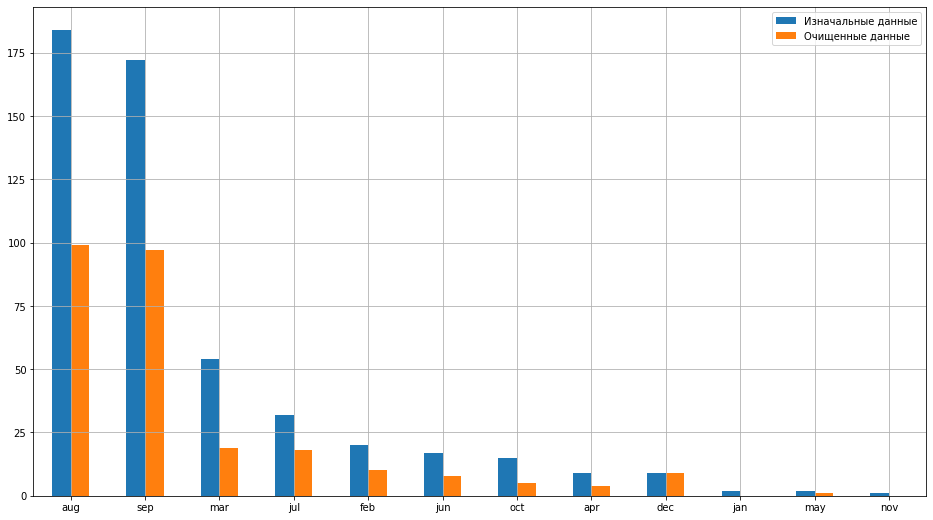

In [98]:
months = data['month'].value_counts().keys()
df = pd.DataFrame({'Изначальные данные': [sum(data['month']==i) for i in months],
                   'Очищенные данные': [sum(cleared_data['month']==i) for i in months]}, index=months)

ax = df.plot.bar(rot=0, figsize=plotsize, grid=True)

<AxesSubplot:xlabel='month', ylabel='area'>

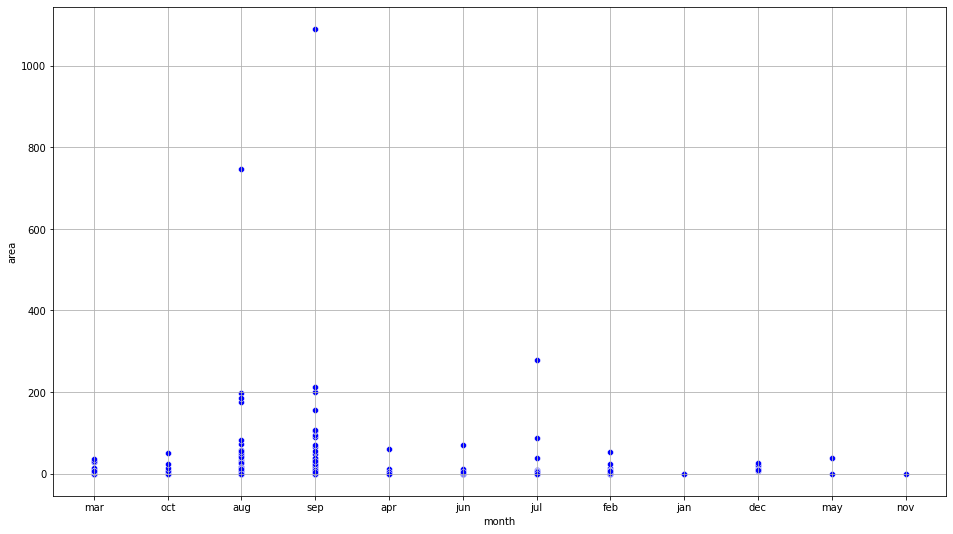

In [57]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.scatterplot(x='month', y='area', data=data, color='b')

<AxesSubplot:xlabel='month', ylabel='area'>

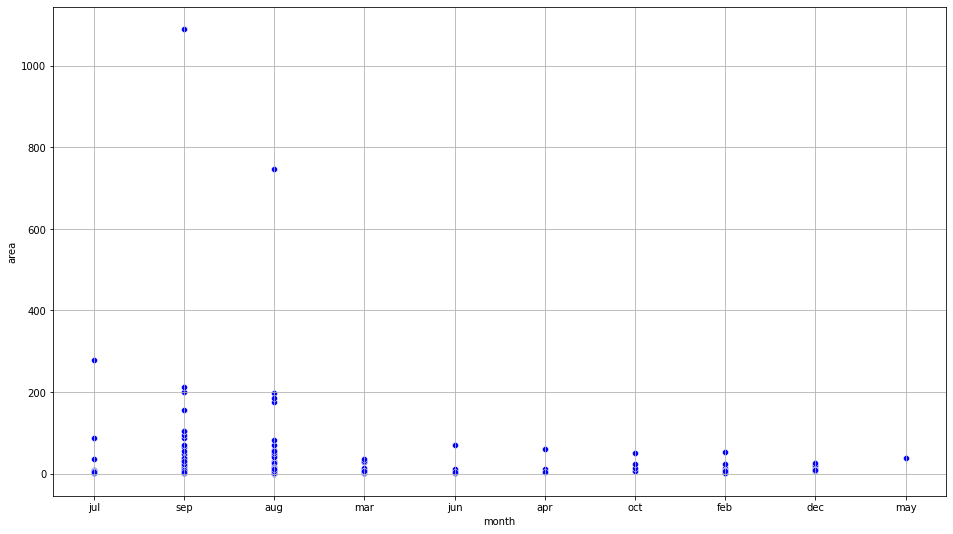

In [54]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.scatterplot(x='month', y='area', data=cleared_data, estimator='mean', color='b')

In [33]:
fires1 = data[data['area'] >= 200.00]
print(fires1.sort_values('area'))

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46   1.8   0.0   200.94
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84


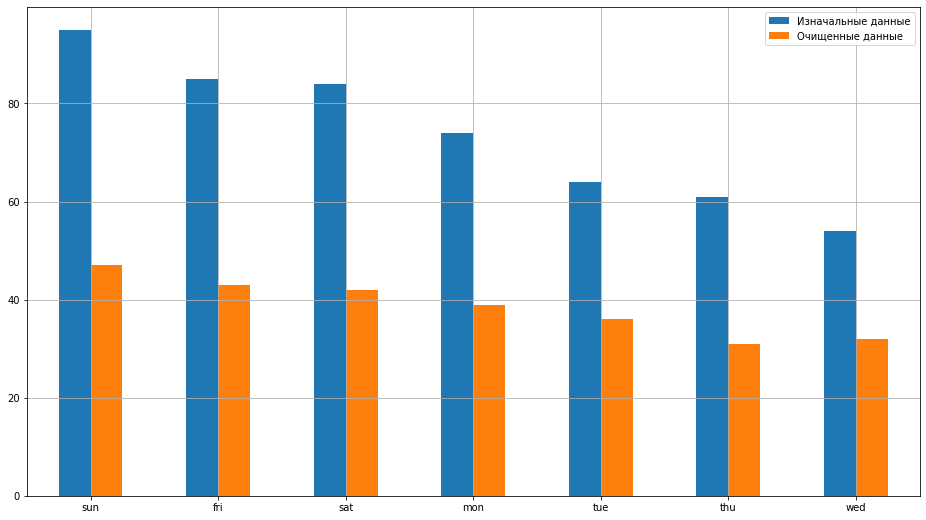

In [99]:
days = data['day'].value_counts().keys()
df = pd.DataFrame({'Изначальные данные': [sum(data['day']==i) for i in days],
                   'Очищенные данные': [sum(cleared_data['day']==i) for i in days]}, index=days)

ax = df.plot.bar(rot=0, figsize=plotsize, grid=True)

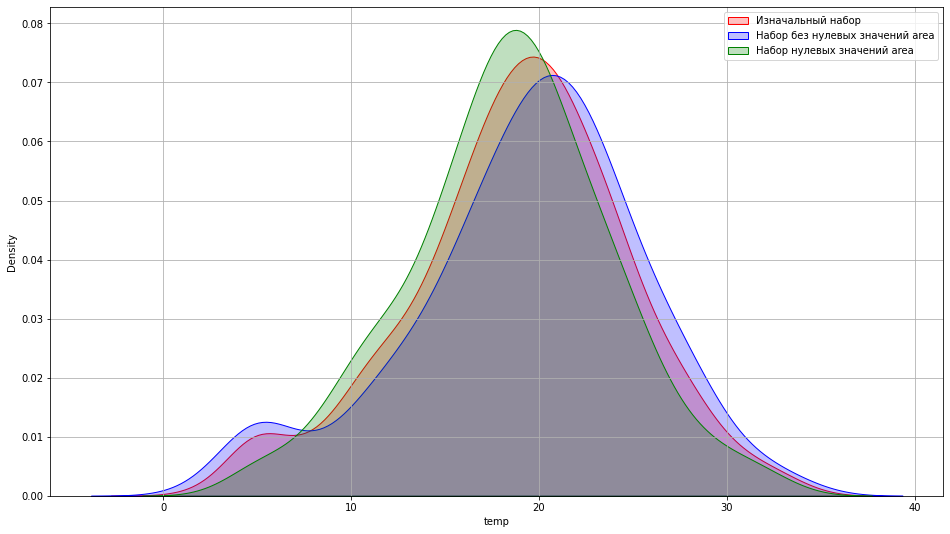

In [20]:
plt.figure(figsize=plotsize)
plt.grid(True)
sns.kdeplot(data['temp'], shade=True, color='r', label="Изначальный набор")
sns.kdeplot(cleared_data['temp'], shade=True, color='b', label="Набор без нулевых значений area")
sns.kdeplot(null_data['temp'], shade=True, color='g', label="Набор нулевых значений area")
plt.legend()

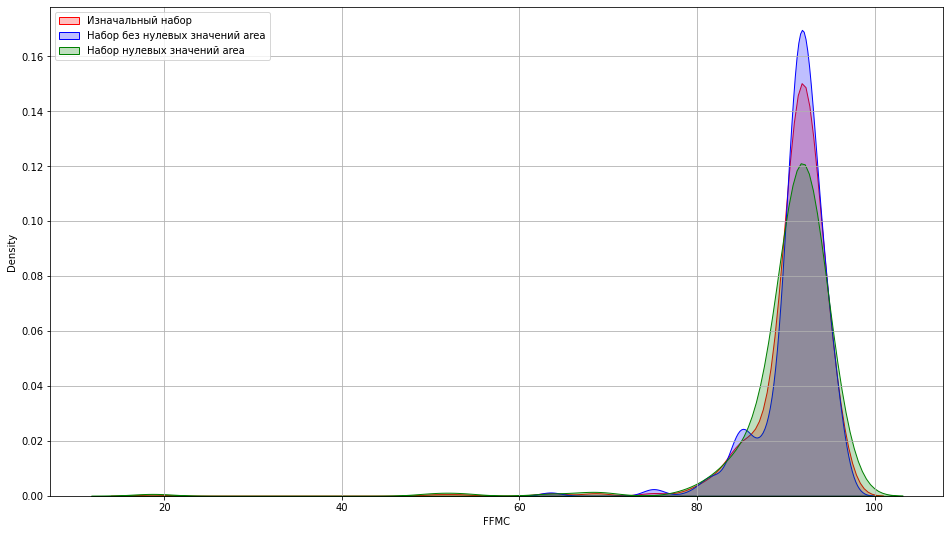

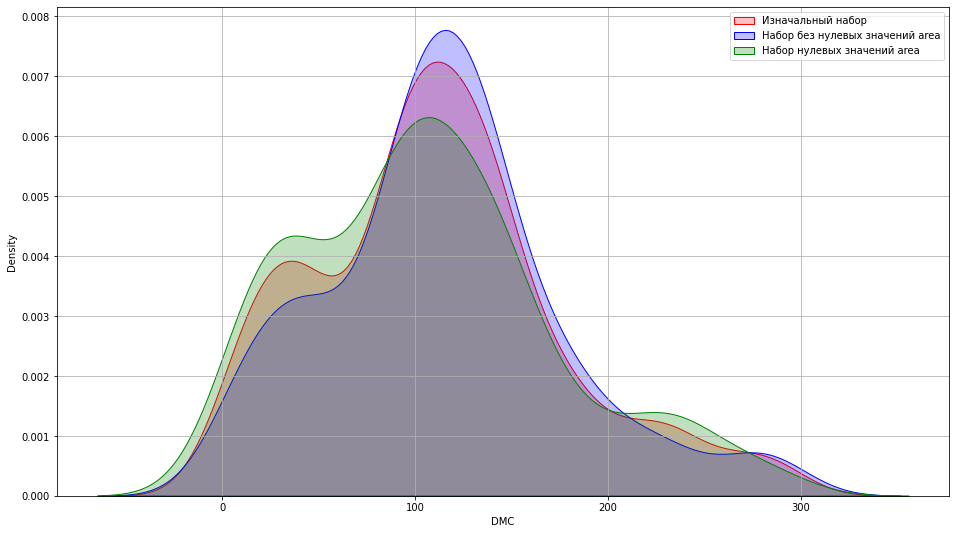

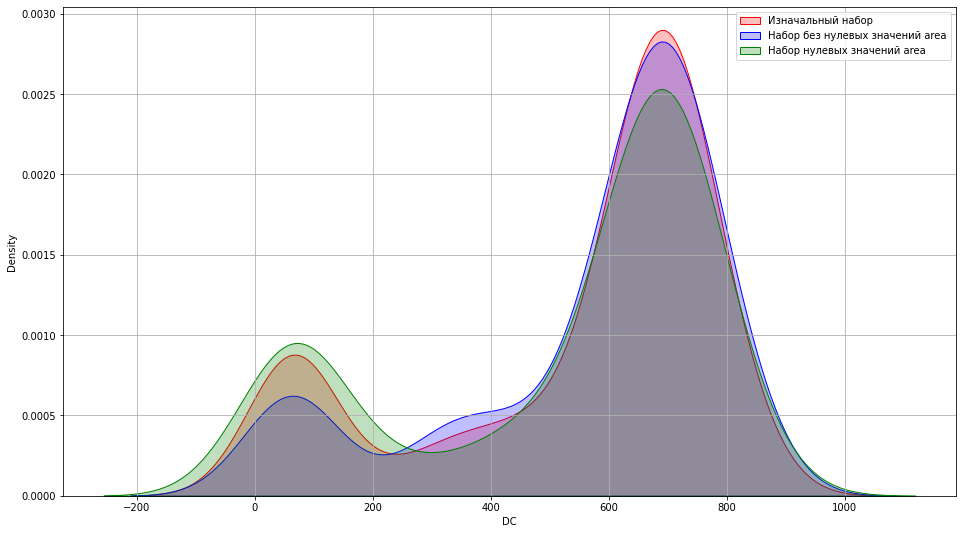

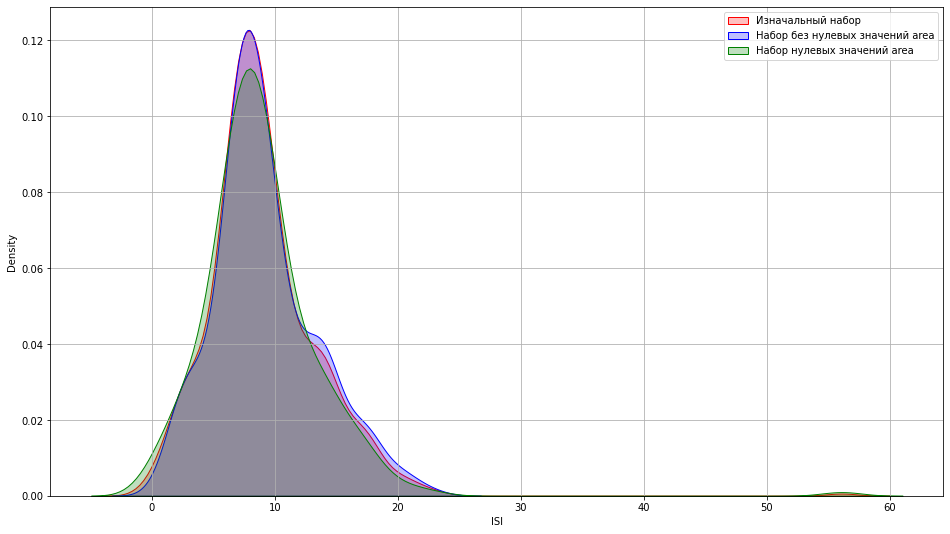

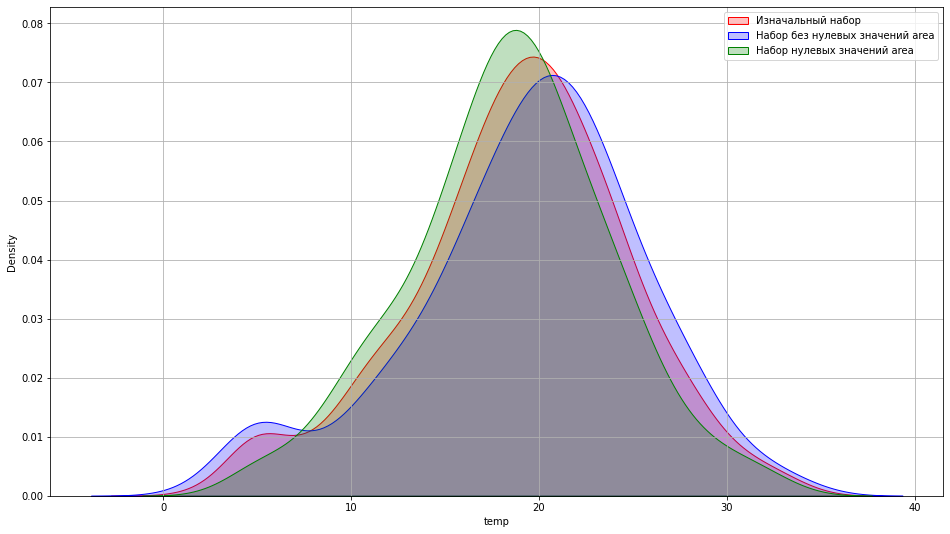

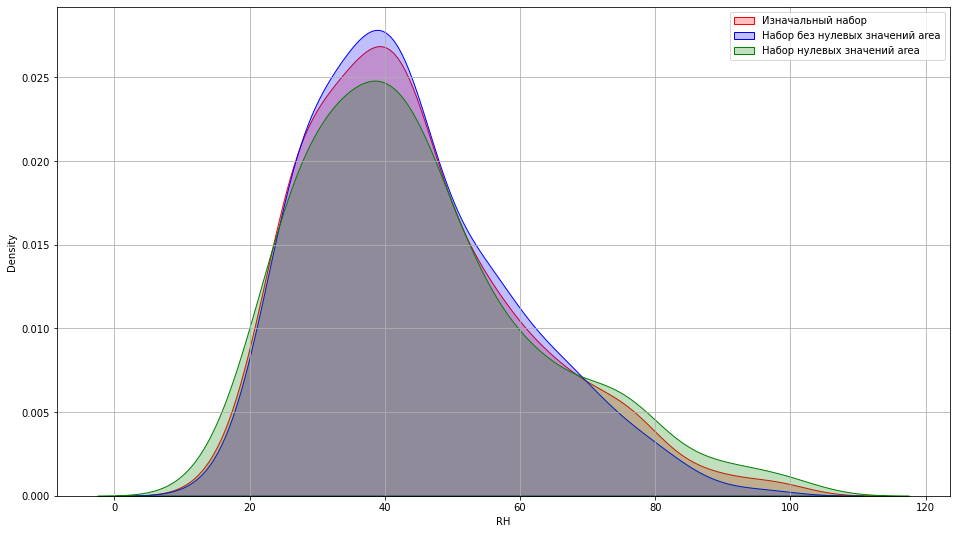

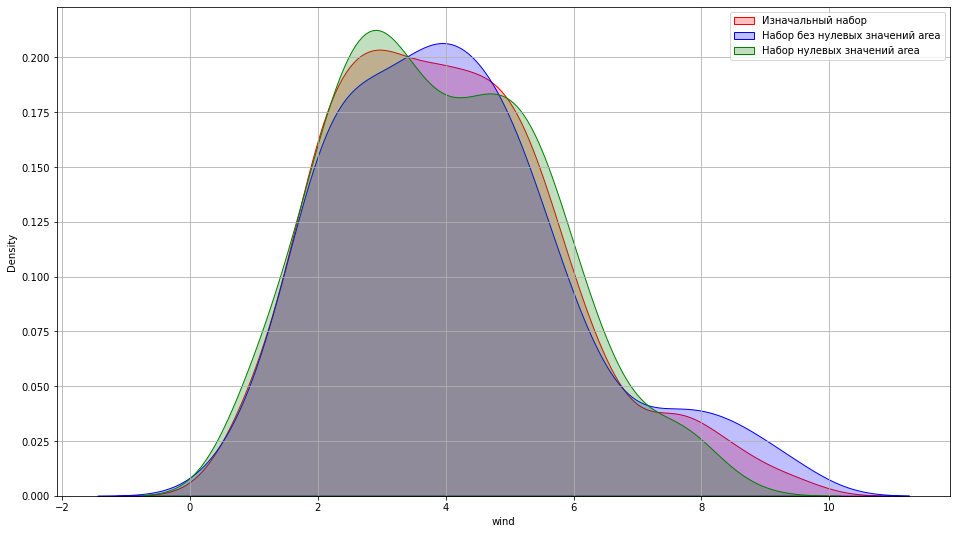

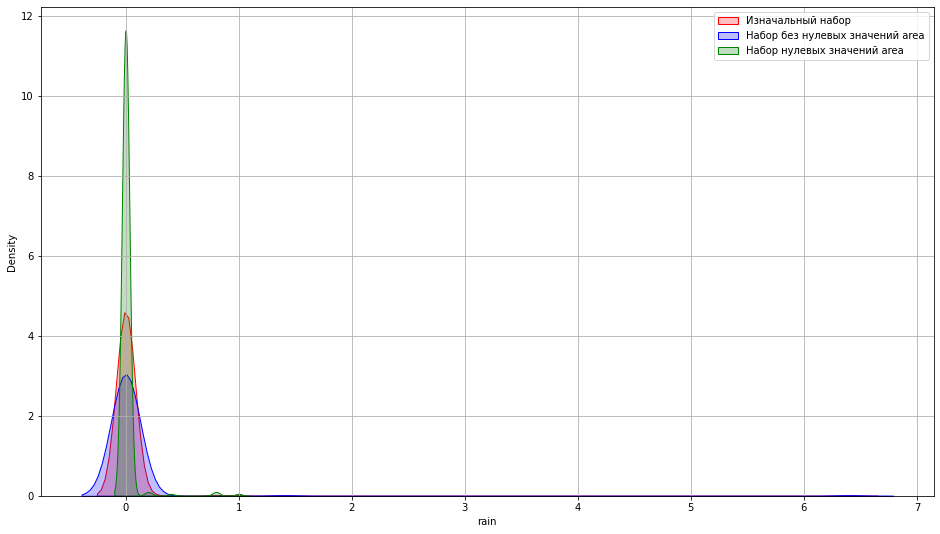

In [21]:
for param in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.kdeplot(data[param], shade=True, color='r', label="Изначальный набор")
    sns.kdeplot(cleared_data[param], shade=True, color='b', label="Набор без нулевых значений area")
    sns.kdeplot(null_data[param], shade=True, color='g', label="Набор нулевых значений area")
    if param == 'FFMC':
        plt.legend(loc='upper left')
    else:
        plt.legend()

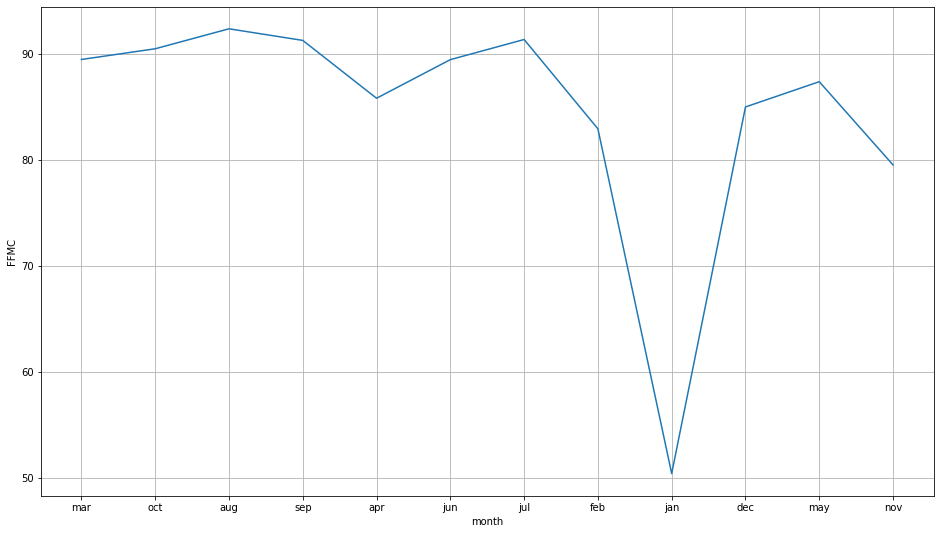

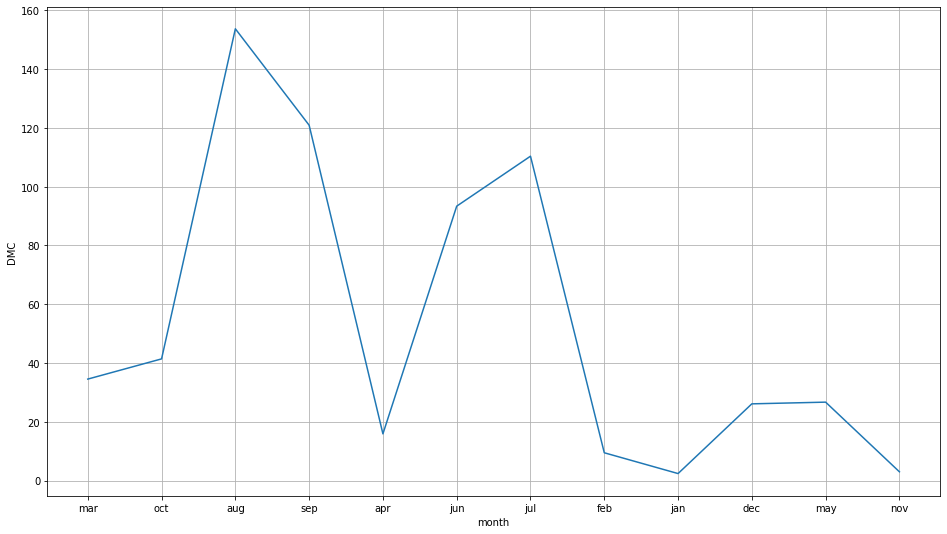

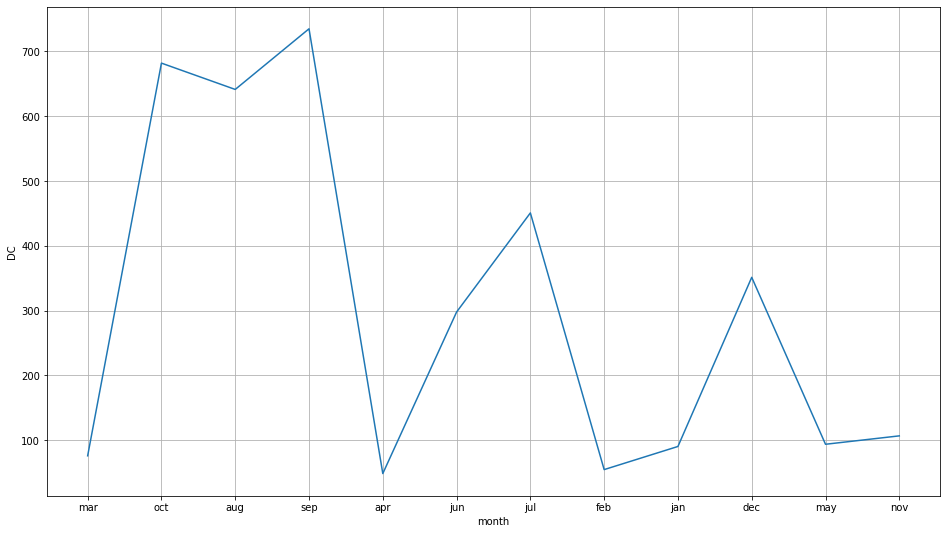

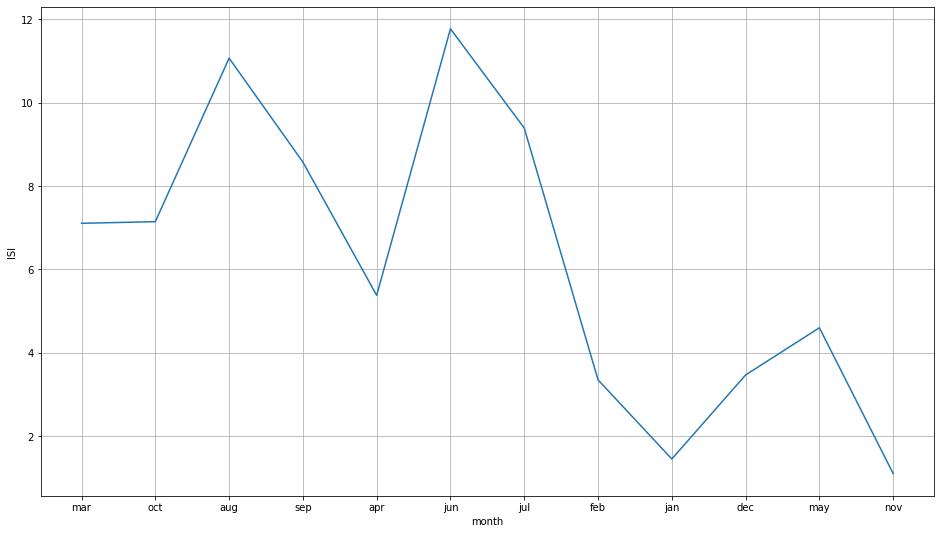

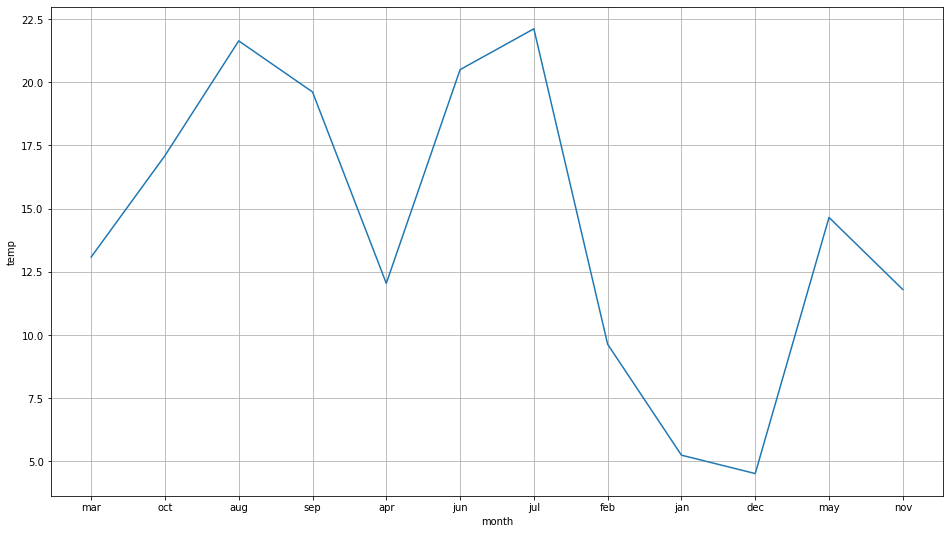

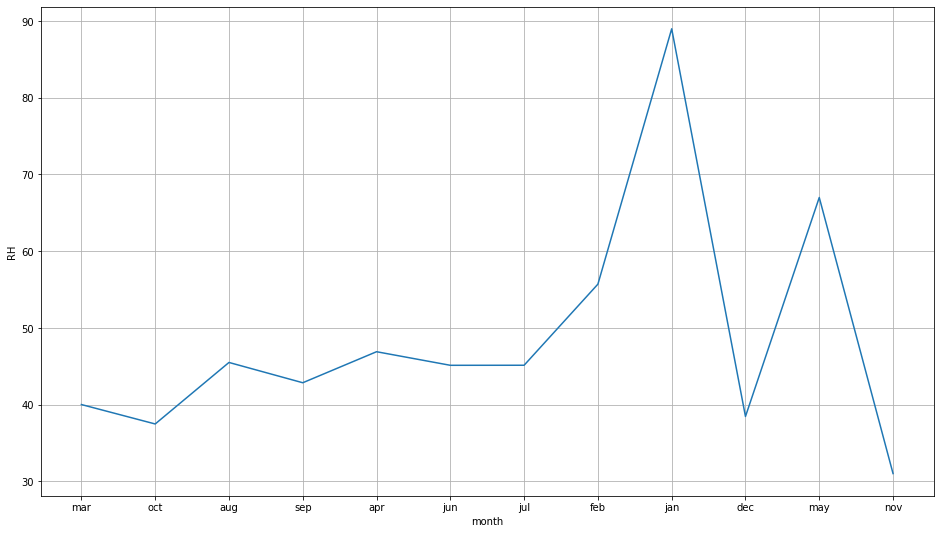

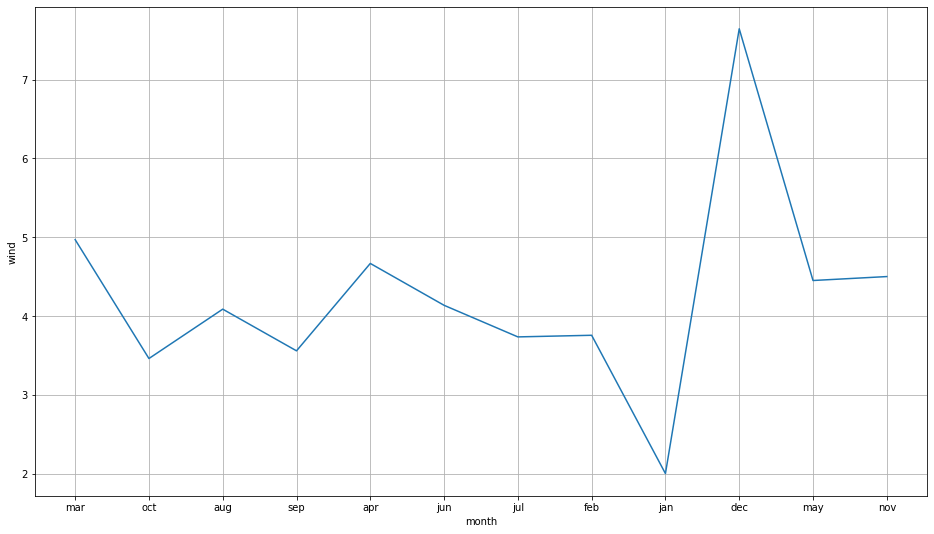

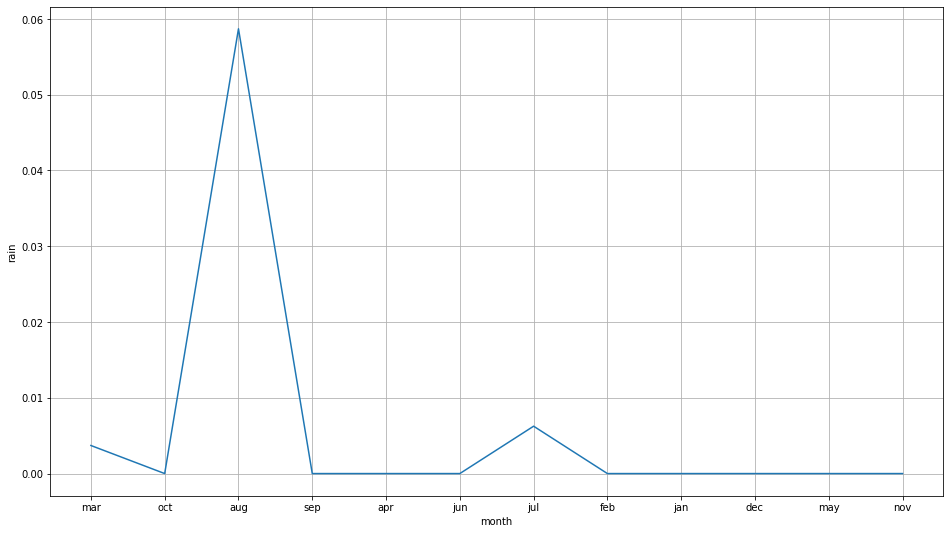

In [32]:
for col in data:
    if col in  ['month', 'X', 'Y', 'day', 'area']:
        continue
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.lineplot(x='month', y=col, data=data, estimator='mean', err_style=None)
#     sns.lineplot(x='month', y='area', data=data, estimator='sum', err_style=None)

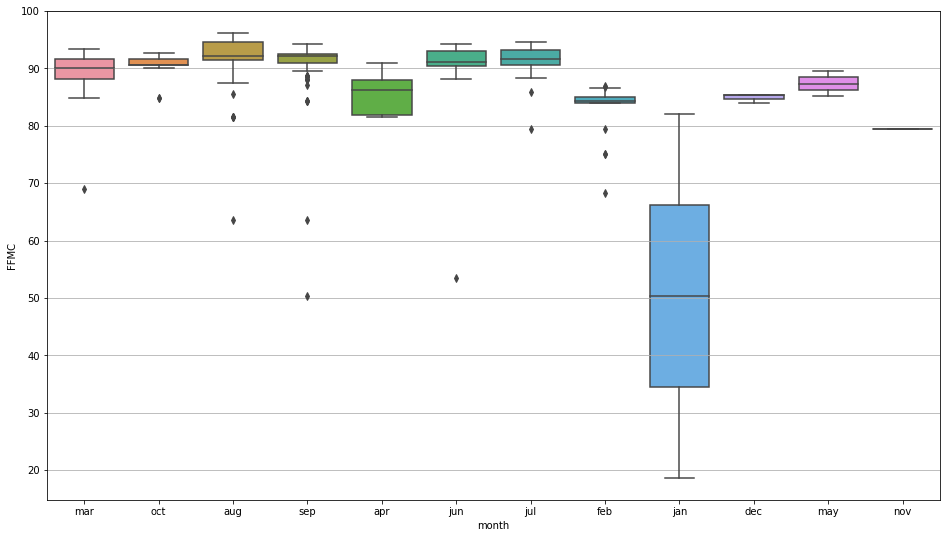

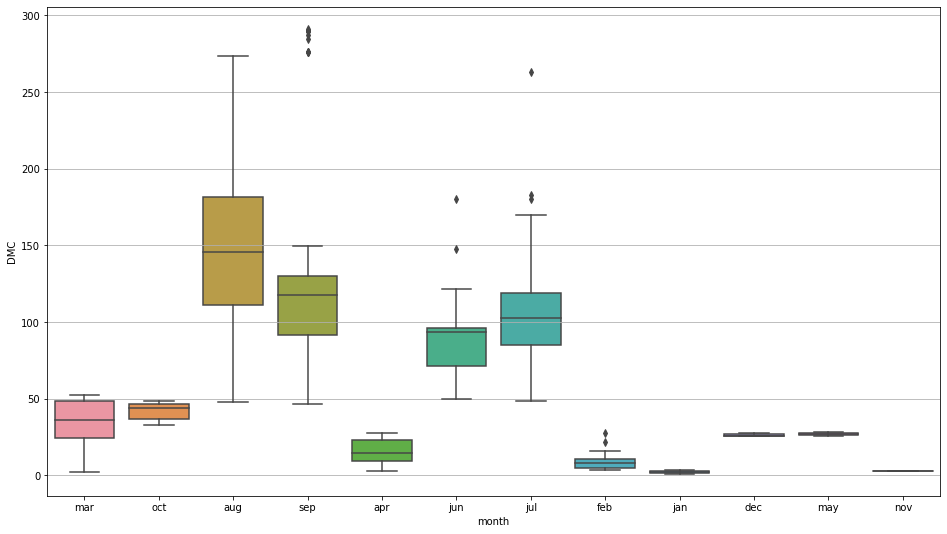

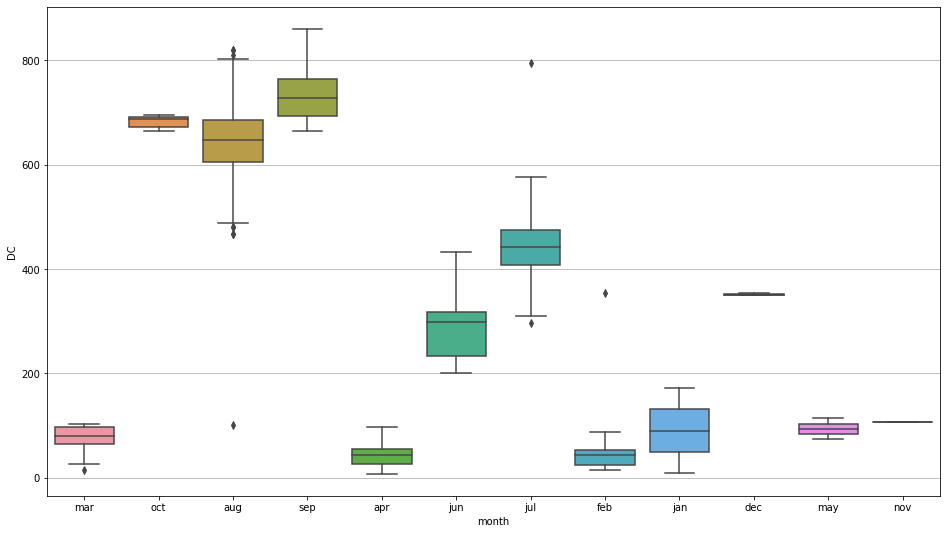

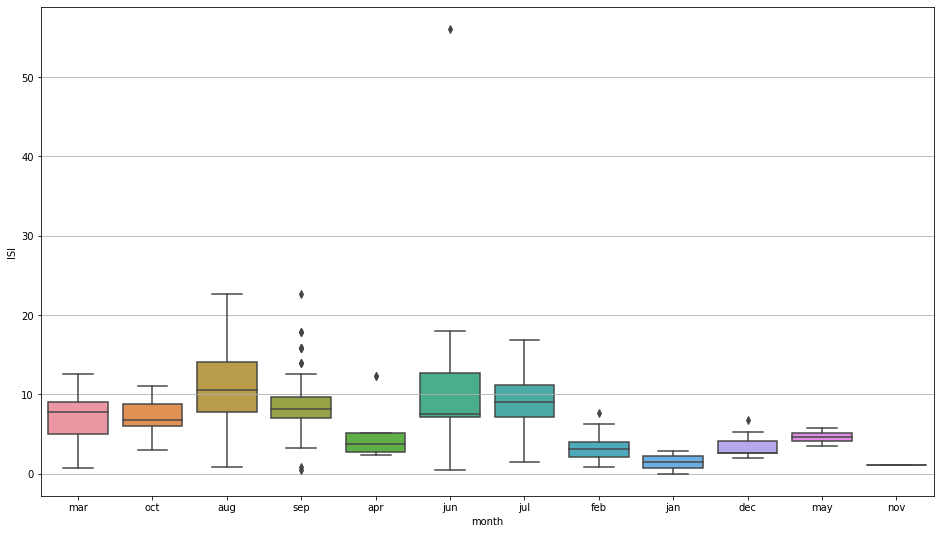

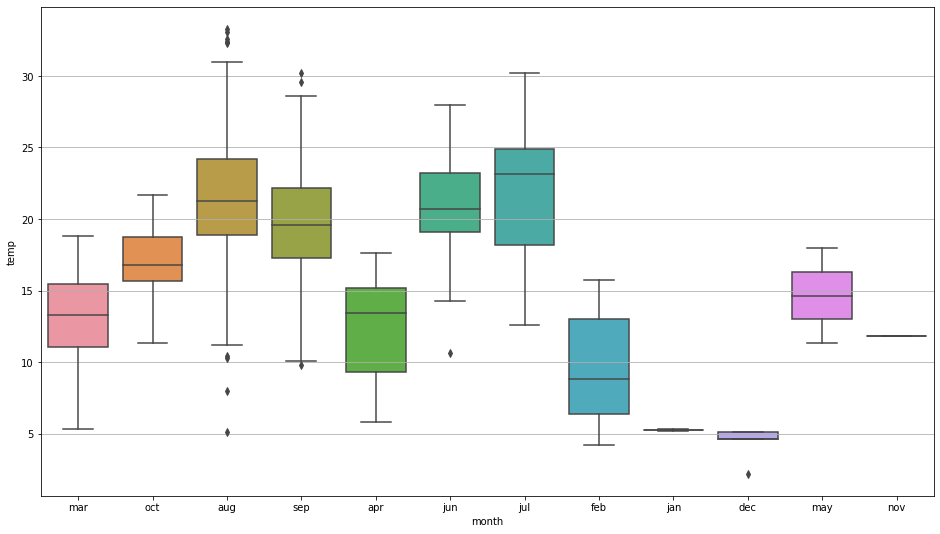

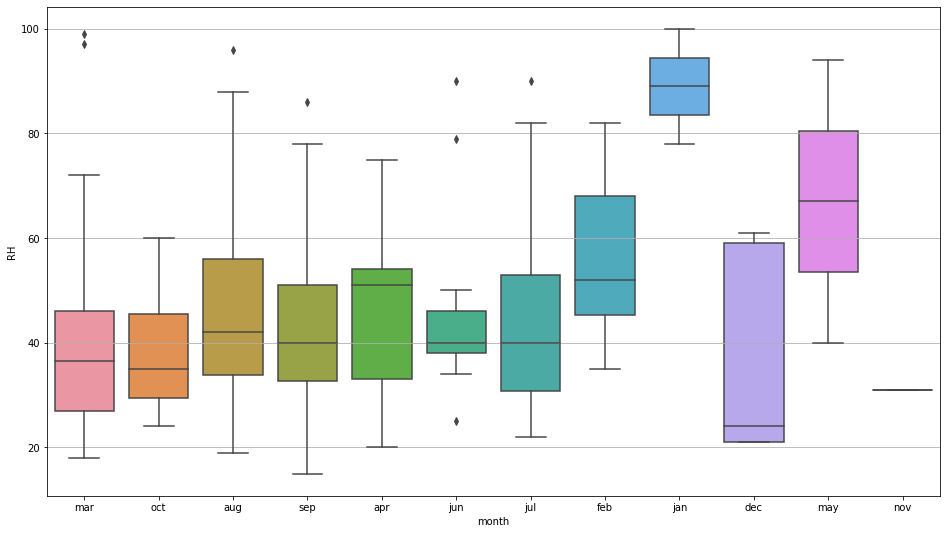

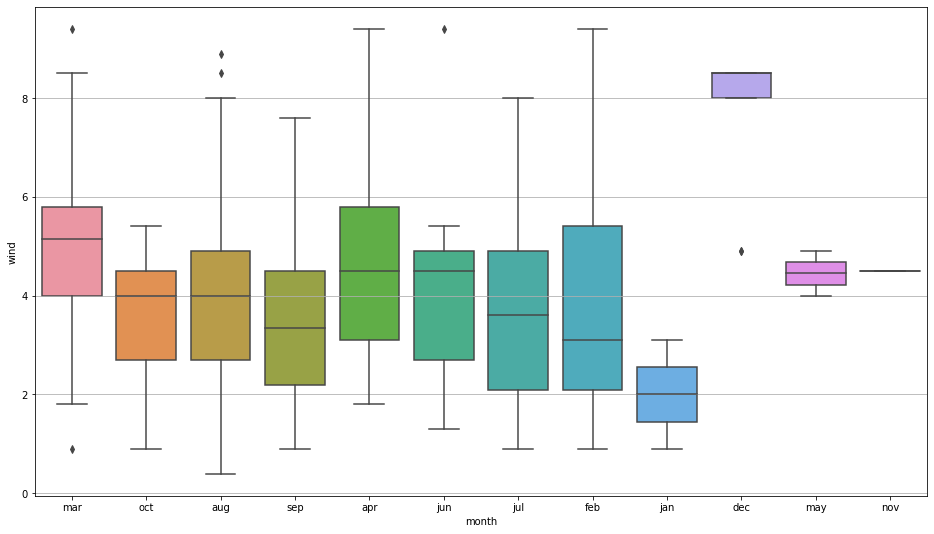

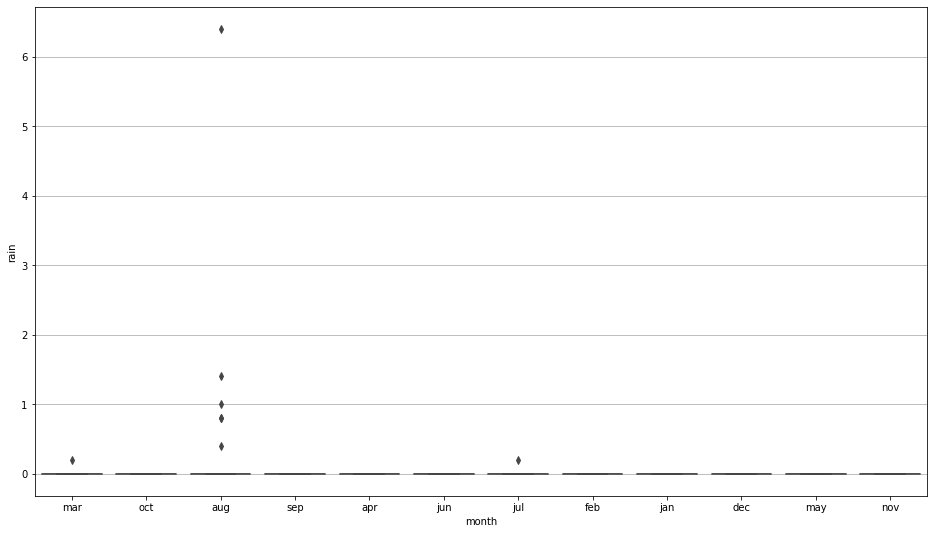

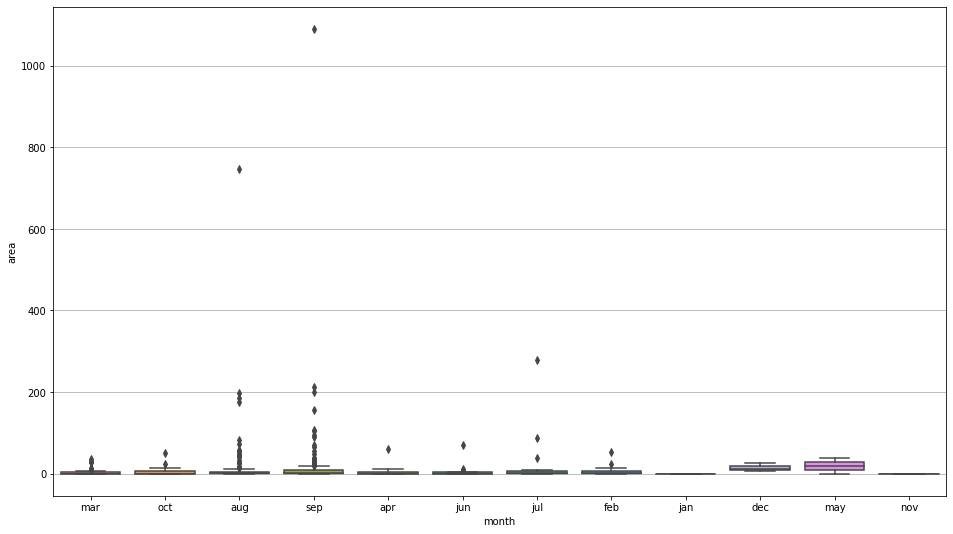

In [109]:
for col in data:
    if col in ['month', 'X', 'Y', 'day']:
        continue
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.boxplot(x='month', y=col, data=data)

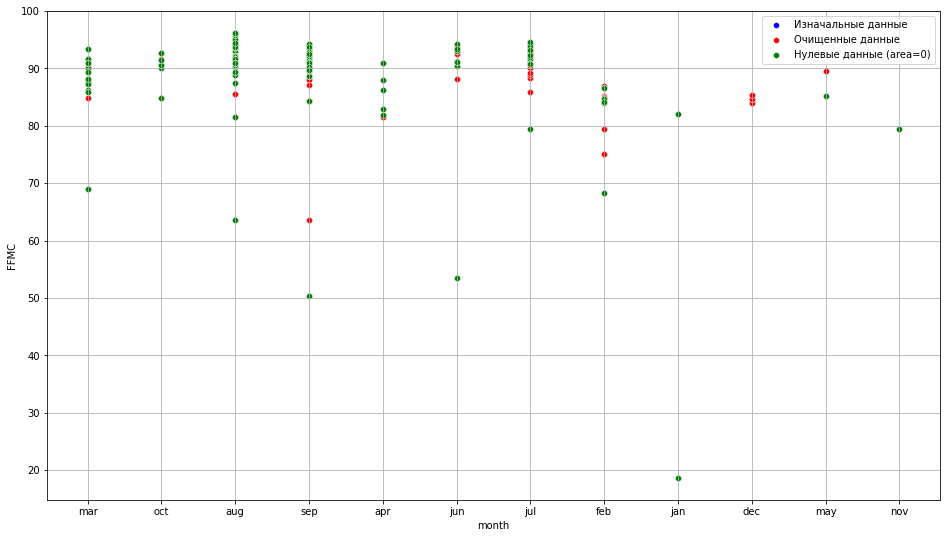

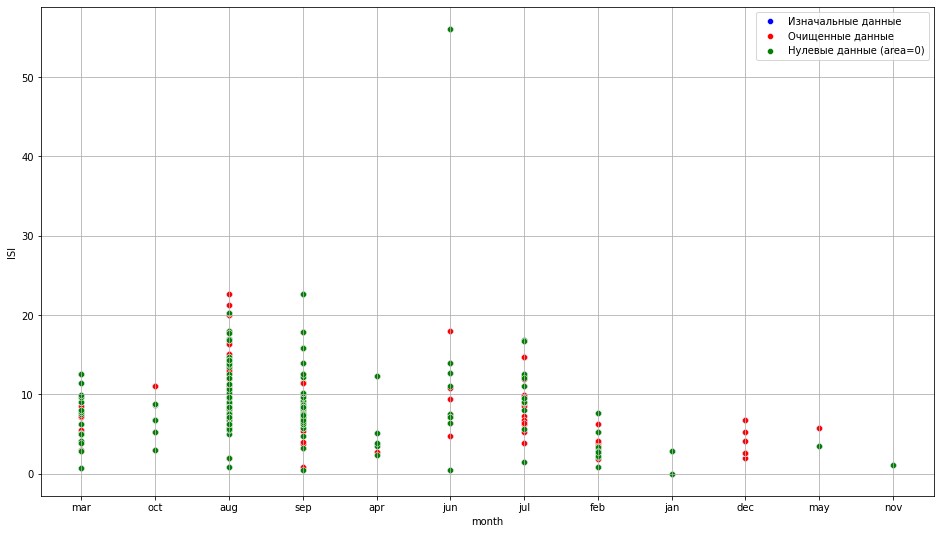

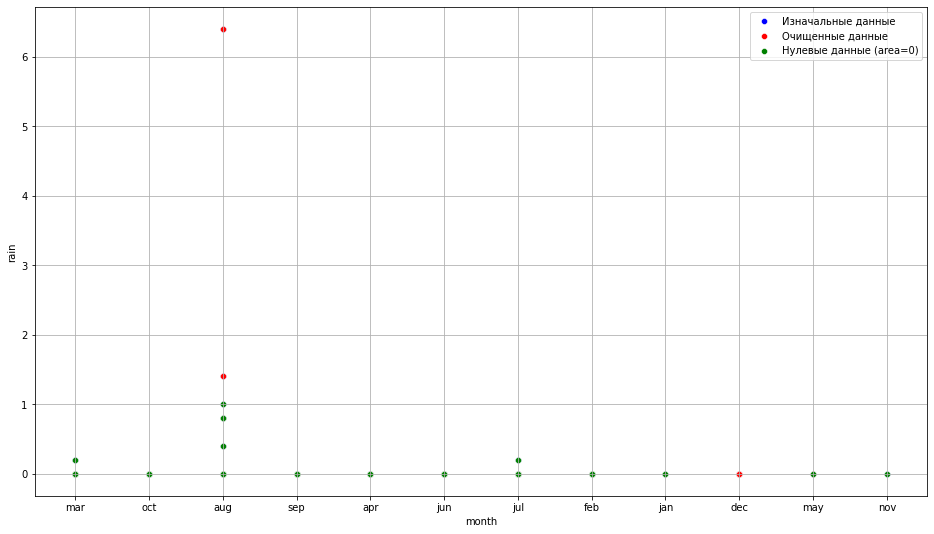

In [22]:
for param in ['FFMC', "ISI", "rain"]:
    plt.figure(figsize=plotsize)
    plt.grid(True)
    sns.scatterplot(x='month', y=param, data=data, color='b', label='Изначальные данные')
    sns.scatterplot(x='month', y=param, data=cleared_data, color='r', label='Очищенные данные')
    sns.scatterplot(x='month', y=param, data=null_data, color='g', label='Нулевые данные (area=0)')
    plt.legend()

## ///////////////////////////////////////PREDICTION/////////////////////////////////////////

<AxesSubplot:>

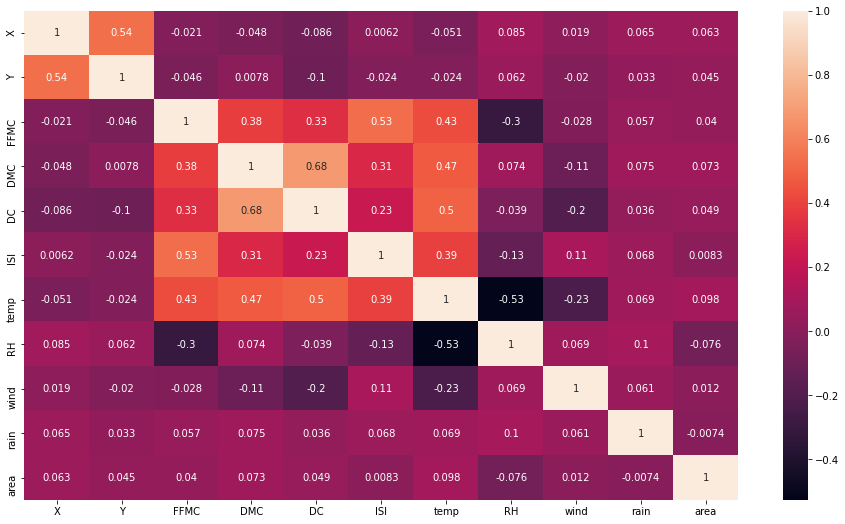

In [39]:
plt.figure(figsize=plotsize)
sns.heatmap(data.corr(), annot=True)

In [67]:
optimized_data = data.drop(['DC'], axis=1)
optimized_data.describe()

,X,Y,FFMC,DMC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


<AxesSubplot:>

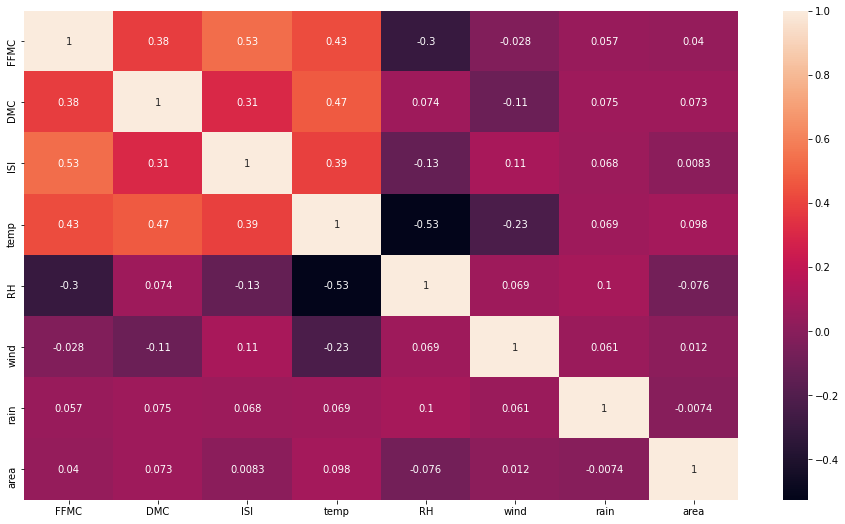

In [11]:
plt.figure(figsize=plotsize)
sns.heatmap(optimized_data.corr(), annot=True)

FFMC  ->  0.35556392380969454
DMC  ->  0.16316734527467092
DC  ->  0.15247489498246253
ISI  ->  0.11706729622681732
temp  ->  0.08712915164565564
RH  ->  0.05903655700272135
wind  ->  0.038575102681278714
rain  ->  0.026985728376699023


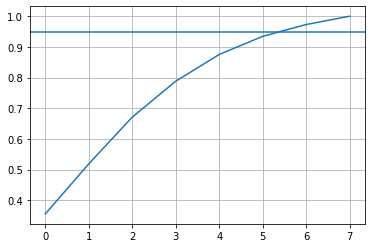

In [37]:
s_scaler = preprocessing.StandardScaler()
normalized_standart_data = data
tmp = s_scaler.fit_transform(normalized_standart_data.loc[:, "FFMC" : "rain"])
normalized_standart_data.loc[:, "FFMC" : "rain"] = tmp
normalized_standart_data['X'] = normalized_standart_data['X'].astype('category')
normalized_standart_data['Y'] = normalized_standart_data['Y'].astype('category')
normalized_standart_data.describe()

X = normalized_standart_data.drop(['area', 'month', 'day', "X", 'Y'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)
    
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95)

FFMC  ->  0.3485732219909117
DMC  ->  0.17811160073151852
ISI  ->  0.15324936478043863
temp  ->  0.13159381909986143
RH  ->  0.09031744723333027
wind  ->  0.06731229664725696
rain  ->  0.03084224951668251


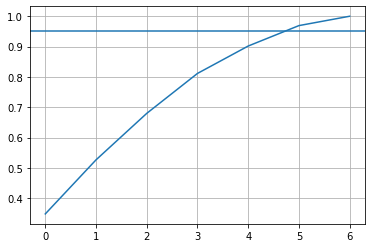

In [9]:
s_scaler = preprocessing.StandardScaler()
optimized_normalized_standart_data = optimized_data
tmp = s_scaler.fit_transform(optimized_normalized_standart_data.loc[:, "FFMC" : "rain"])
optimized_normalized_standart_data.loc[:, "FFMC" : "rain"] = tmp
optimized_normalized_standart_data['X'] = optimized_normalized_standart_data['X'].astype('category')
optimized_normalized_standart_data['Y'] = optimized_normalized_standart_data['Y'].astype('category')
optimized_normalized_standart_data.describe()

X = optimized_normalized_standart_data.drop(['area', 'month', 'day', "X", 'Y'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)
    
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95)

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [38]:
from sklearn.model_selection import train_test_split

X = normalized_standart_data.drop(['month', 'day', "X", 'Y'], axis=1)
target = X.area
train = X.drop(['area'], axis = 1)
models_results = []

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)

## ORIGINAL DATA

In [193]:
dirty_data = data.drop(['month', 'day', "X", 'Y'], axis=1)
X = dirty_data.values[:,0:8]
Y = dirty_data.values[:,8]
results = {}

In [194]:
from sklearn.linear_model import LinearRegression
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["OriginalData Linear Regression"] = [score, mae]

Linear Regression
Score: 0.01601284619400667
Mean Absolute Error: 19.287666647502647


In [195]:
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X,Y)
prediction_knreg = knreg.predict(X)
score = explained_variance_score(Y, prediction_knreg)
mae = mean_absolute_error(prediction_knreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["OriginalData K-Neighbors Regressor"] = [score, mae]

K-Neighbors Regressor
Score: 0.271431283573227
Mean Absolute Error: 15.676471953578334


In [196]:
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["OriginalData RandomForest"] = [score, mae]

Random Forest Regressor
Score: 0.8464402944410733
Mean Absolute Error: 7.8923973850971745


## БЕЗ DC

In [197]:
dirty_data = optimized_data.drop(['month', 'day', "X", 'Y'], axis=1)
X = dirty_data.values[:,0:7]
Y = dirty_data.values[:,7]

In [198]:
from sklearn.linear_model import LinearRegression
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["Without_DC Linear Regression"] = [score, mae]

Linear Regression
Score: 0.01577636569180907
Mean Absolute Error: 19.32676925076747


In [199]:
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X,Y)
prediction_knreg = knreg.predict(X)
score = explained_variance_score(Y, prediction_knreg)
mae = mean_absolute_error(prediction_knreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["Without_DC K-Neighbors Regressor"] = [score, mae]

K-Neighbors Regressor
Score: 0.0837144818780674
Mean Absolute Error: 19.31836363636364


In [200]:
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["Without_DC RandomForest"] = [score, mae]

Random Forest Regressor
Score: 0.854953616528698
Mean Absolute Error: 7.714606563046885


## НОРМАЛИЗОВАННЫЕ ДАННЫЕ

In [201]:
ditry_data = optimized_normalized_standart_data.drop(['month', 'day', "X", 'Y'], axis=1)
X = dirty_data.values[:,0:7]
Y = dirty_data.values[:,7]

In [202]:
from sklearn.linear_model import LinearRegression
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["NormalizedData Linear Regression"] = [score, mae]

Linear Regression
Score: 0.01577636569180907
Mean Absolute Error: 19.32676925076747


In [203]:
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X,Y)
prediction_knreg = knreg.predict(X)
score = explained_variance_score(Y, prediction_knreg)
mae = mean_absolute_error(prediction_knreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["NormalizedData K-Neighbors Regressor"] = [score, mae]

K-Neighbors Regressor
Score: 0.0837144818780674
Mean Absolute Error: 19.31836363636364


In [204]:
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["NormalizedData RandomForest"] = [score, mae]

Random Forest Regressor
Score: 0.8619719651016677
Mean Absolute Error: 7.633387993418577


## C УЧЕТОМ ВЫБРОСОВ

Обнаружены в area, FFMC, ISI, rain

In [205]:
optimized_normalized_standart_data.describe()

,FFMC,DMC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,5.170000e+02,5.170000e+02,517.000000,5.170000e+02,5.170000e+02,517.000000
mean,0.000000,0.000000,-1.030768e-17,-1.374357e-17,0.000000,4.982045e-17,1.030768e-17,12.847292
std,1.000969,1.000969,1.000969e+00,1.000969e+00,1.000969,1.000969e+00,1.000969e+00,63.655818
min,-13.045818,-1.715608,-1.980578e+00,-2.876943e+00,-1.796637,-2.021098e+00,-7.326831e-02,0.000000
25%,-0.080635,-0.660665,-5.535954e-01,-5.842379e-01,-0.692456,-7.361236e-01,-7.326831e-02,0.000000
50%,0.173229,-0.040203,-1.364774e-01,7.082076e-02,-0.140366,-9.833712e-03,-7.326831e-02,0.520000
75%,0.408960,0.492739,3.904086e-01,6.741643e-01,0.534411,4.929823e-01,-7.326831e-02,6.570000
max,1.007353,2.819865,1.033538e+01,2.484195e+00,3.417549,3.007063e+00,2.157228e+01,1090.840000


In [206]:
FFMC_filter_barrier = np.percentile(optimized_normalized_standart_data.FFMC, 90)
print(FFMC_filter_barrier)
ISI_filter_barrier = np.percentile(optimized_normalized_standart_data.ISI, 90)
print(ISI_filter_barrier)
rain_filter_barrier = np.percentile(optimized_normalized_standart_data.rain, 90)
print(rain_filter_barrier)
area_filter_barrier = np.percentile(optimized_normalized_standart_data.area, 90)
print(area_filter_barrier)

0.6628235393505433
1.1587839012217296
-0.07326830956410953
25.262000000000043


In [207]:
print(len(optimized_normalized_standart_data[optimized_normalized_standart_data['FFMC'] > FFMC_filter_barrier]))
print(len(optimized_normalized_standart_data[optimized_normalized_standart_data['ISI'] > ISI_filter_barrier]))
print(len(optimized_normalized_standart_data[optimized_normalized_standart_data['rain'] > rain_filter_barrier]))
print(len(optimized_normalized_standart_data[optimized_normalized_standart_data['area'] > area_filter_barrier]))

50
49
8
52


In [208]:
# df = optimized_normalized_standart_data.drop(np.where(optimized_normalized_standart_data['FFMC'] > FFMC_filter_barrier)[0])
# df = df.drop(np.where(df['ISI'] > ISI_filter_barrier)[0])
# 
df = optimized_normalized_standart_data
df = df.loc[(df['FFMC'] <= FFMC_filter_barrier) & (df['ISI'] <= ISI_filter_barrier) & (df['area'] <= area_filter_barrier) & (df['rain'] <= rain_filter_barrier)]
print(len(df))

393


In [209]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X       393 non-null    category
 1   Y       393 non-null    category
 2   month   393 non-null    object  
 3   day     393 non-null    object  
 4   FFMC    393 non-null    float64 
 5   DMC     393 non-null    float64 
 6   ISI     393 non-null    float64 
 7   temp    393 non-null    float64 
 8   RH      393 non-null    float64 
 9   wind    393 non-null    float64 
 10  rain    393 non-null    float64 
 11  area    393 non-null    float64 
dtypes: category(2), float64(8), object(2)
memory usage: 35.3+ KB


,FFMC,DMC,ISI,temp,RH,wind,rain,area
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,-0.146846,-0.095619,-0.284455,-0.159331,0.035235,-0.064565,-0.073268,2.772443
std,1.079086,1.032507,0.654681,0.966426,0.985070,1.019362,0.000000,4.748531
min,-13.045818,-1.715608,-1.980578,-2.876943,-1.796637,-2.021098,-0.073268,0.000000
25%,-0.116901,-0.949798,-0.597503,-0.722145,-0.692456,-0.736124,-0.073268,0.000000
50%,0.136963,-0.133975,-0.268199,-0.049848,-0.140366,-0.233308,-0.073268,0.000000
75%,0.282028,0.408344,0.126966,0.467304,0.595754,0.492982,-0.073268,3.710000
max,0.662824,2.819865,1.158784,1.949805,3.417549,3.007063,-0.073268,24.770000


<AxesSubplot:>

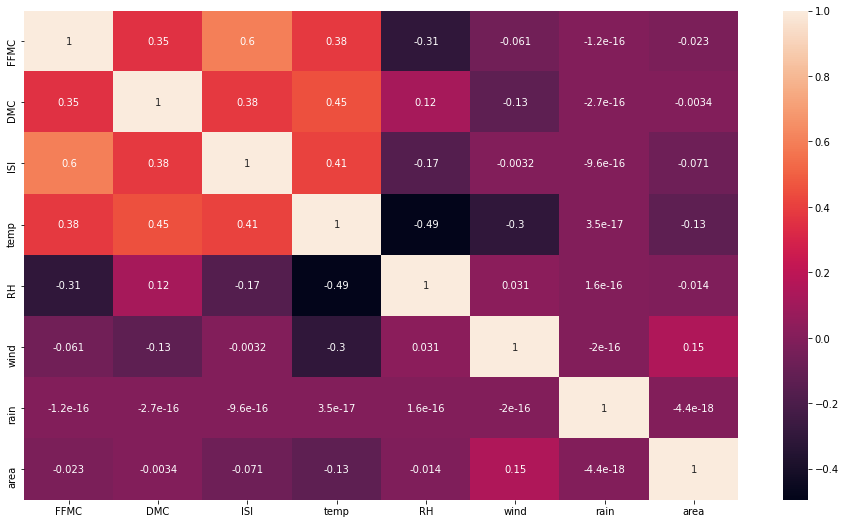

In [210]:
plt.figure(figsize=plotsize)
sns.heatmap(df.corr(), annot=True)

In [211]:
dirty_data = df.drop(['month', 'day', "X", 'Y'], axis=1)
X = dirty_data.values[:,0:7]
Y = dirty_data.values[:,7]

In [212]:
from sklearn.linear_model import LinearRegression
print("Linear Regression")
Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["Clean Linear Regression"] = [score, mae]

Linear Regression
Score: 0.04905616769016252
Mean Absolute Error: 3.337211058543499


In [213]:
print('K-Neighbors Regressor')
knreg = KNeighborsRegressor()
knreg.fit(X,Y)
prediction_knreg = knreg.predict(X)
score = explained_variance_score(Y, prediction_knreg)
mae = mean_absolute_error(prediction_knreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["Clean K-Neighbors Regressor"] = [score, mae]

K-Neighbors Regressor
Score: 0.32551419611631005
Mean Absolute Error: 2.6856234096692106


In [214]:
print('Random Forest Regressor')
rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)
results["Clean RandomForest"] = [score, mae]

Random Forest Regressor
Score: 0.7875023373783986
Mean Absolute Error: 1.5001791571109127


In [215]:
result_df = pd.DataFrame.from_dict(results)

In [216]:
result_df

,OriginalData Linear Regression,OriginalData K-Neighbors Regressor,OriginalData RandomForest,Without_DC Linear Regression,Without_DC K-Neighbors Regressor,Without_DC RandomForest,NormalizedData Linear Regression,NormalizedData K-Neighbors Regressor,NormalizedData RandomForest,Clean Linear Regression,Clean K-Neighbors Regressor,Clean RandomForest
0,0.016013,0.271431,0.846440,0.015776,0.083714,0.854954,0.015776,0.083714,0.861972,0.049056,0.325514,0.787502
1,19.287667,15.676472,7.892397,19.326769,19.318364,7.714607,19.326769,19.318364,7.633388,3.337211,2.685623,1.500179
